<div class="bg-primary text-info"><br><center><h1>Notion de programme en tant que donnée, calculabilité, décidabilité</h1></center><br></div>

---
## Un programme en tant que donnée ?

Nous sommes habitués à utiliser des **programmes** Python qui sont souvent faits de **fonctions**. Ces fonctions manipulent des **variables** qui sont les **données** de nos programmes.  
Tous ces termes distinguent des éléments de l'informatique qui sont bien différents par nature. Pourtant, les programmes ne peuvent-ils pas être considérés comme des données ?  

### Un exemple simple
Voici ci-dessous une fonction simple `hello` qui prend en paramètre un nom affiche le texte `Hello` suivi du nom :

In [ ]:
def hello(name):
    print('Hello',name)

In [ ]:
hello("terminale NSI")

Dans ce programme, `hello` est une fonction et `name` est une donnée, deux notions qui ne semblent pas de nature comparable.  
Pourtant, notre fonction `hello` n'est rien d'autre qu'une succession de caractères. On peut donc l'écrire dans une chaîne de caractères de la manière suivante :

In [ ]:
fct_hello = "def hello(name):\n\tprint('Hello',name)"

In [ ]:
print(fct_hello)

Notre fonction est maintenant devenue une chaine de caractères.  
Considérons le programme suivant, qui permet de décomposer une chaine de caractères en fonction, puis de l'exécuter avec des paramètres :

In [ ]:
def universel(algo, *args):
    exec(algo)
    ligne1 = algo.split('\n')[0]
    nom = ligne1.split('(')[0][4:]
    return eval(f"{nom}{args}")

On peut donc appeler ce programme en lui passant en arguments :
- La variable contenant notre fonction
- La donnée sur laquelle celle-ci va travailler  

et obtenir le résultat.

In [ ]:
universel(fct_hello, 'Term NSI')

Ci-dessus nous avons donc bien utilisé notre programme `fct_hello` et nos données `'Term NSI'` en tant qu'objets de même nature : des **données**.

**Un programme est donc une lui même une donnée qui peut être utilisée et modifiée par d'autres programmes**



### D'autres exemples

- Un **système d'exploitation** peut être vu comme un programme qui a pour données d'autres programmes qu'il fait "tourner".
- L'appel de la **commande** `python monprogramme.py` lance le programme `python` qui prend en donnée le programme `monprogramme.py` enregistré dans un fichier.
- Pour télécharger un logiciel on utilise un **gestionnaire de téléchargement** qui est lui-même un logiciel.
- Les **compilateurs** utilisent comme données le code source de programmes pour le transformer en langage machine ou en fichier .exe.






---
## Calculabilité, décidabilité


### Le problème du barbier

Dans une ville où les gens soit se rasent eux-mêmes soit se font raser par le barbier, qui rase le barbier ?


Pour répondre à cette question, on peut raisonner ainsi :
- soit le barbier se rase lui-même => il n'est pas rasé par le barbier
- soit le barbier ne se rase pas lui même => il est donc rasé par le barbier

Nous obtenons ici une **contradiction**.

Ceci nous permet de conclure que l'hypothèse de départ est fausse. Une ville avec de tels habitants ne peut exister et l'algorithme qui permet de calculer la solution à ce problème n'existe pas non plus.

Ce paradoxe bien connu nous permet d'énoncer les affirmations suivantes :

- On ne peut pas tout programmer.
- Pour tout problème, il n'est pas possible d'écrire un programme qui permette de calculer une solution.
- Tout problème n'as pas forcément de solution.


### Décidabilité
Un problème est dit **décidable** s'il existe un algorithme, une procédure mécanique qui se termine en un nombre fini d'étapes qui réponde par **oui ou par non** à la question posée par le problème.
S'il n'existe pas de tel algorithme, le problème est dit **indécidable**

*Exemples:*
- Un problème décidable : **"Pour $x \in \mathbb{N}$, $x$ est-il pair ?"** est décidable car il existe un algorithme qui se termine en un temps fini qui décide si oui ou non x est pair.
- Un problème indécidable : **"Le barbier se rase-t-il ?"** du paradoxe précédent.


### Calculabilité

Une fonction $f$ est une fonction **calculable** s'il existe une méthode précise qui, étant donné un argument, permet d'obtenir l'image $f(x)$ en un nombre fini d'étapes.


*Exemples:*
- Une fonction calculable : Soit $x \in \mathbb{N}$, la fonction **"Quel est le reste de la division euclidienne de $x$ par 2 ?"** est calculable. Il existe un algorithme qui se termine en un temps fini qui calcule le reste de la division euclidienne de $x$ par 2.
- Une fonction non calculable : **"Qui rase le barbier ?"** du paradoxe du précédent.



### Historique et machine de Turing

- En 1930,  **[Alonzo Church](https://fr.wikipedia.org/wiki/Alonzo_Church)** identifie une classe de fonctions mathématiques que l'on peut décomposer et qui sont donc calculables.
- En 1936, **[Alan Turing](https://fr.wikipedia.org/wiki/Alan_Turing)** présente la machine qui porte son nom. Il montre que l'ensemble des  fonctions calculables de Church sont identiques à l'ensemble des fonctions programmables sur sa machine.  
L'introduction de [cette vidéo](https://www.youtube.com/watch?v=OGeOQzGq4LE) *(jusqu'à 8mn20)* présente de manière simplifiée la machine de Turing.

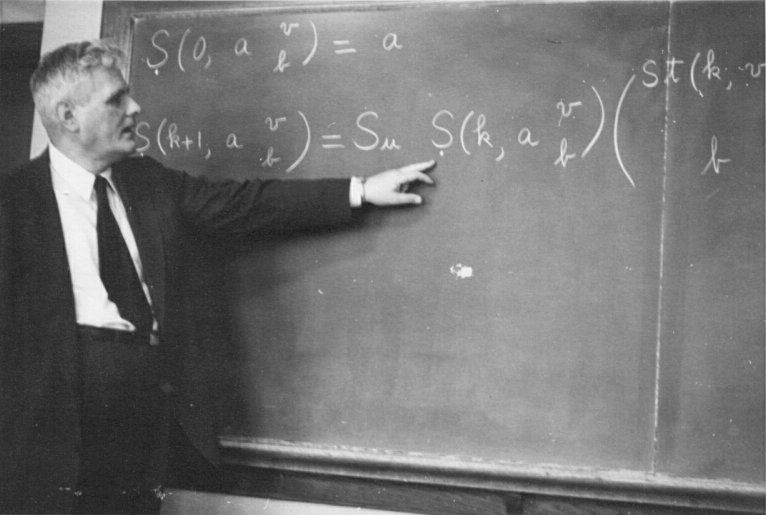
<center><i>Alonzo Church (1903-1995)</i></center>

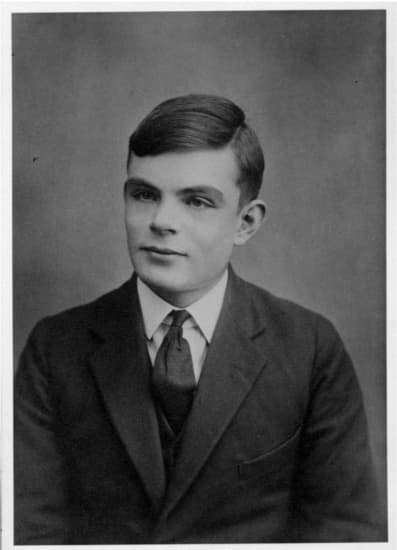
<center><i>Alan Turing (1912-1954)</i></center>



La thèse de Church-Turing affirme que tout traitement réalisable mécaniquement peut être accompli par une machine de Turing : tout programme d'ordinateur, peu importe le langage dans lequel il est écrit, peut donc être traduit en une machine de Turing.
Cette thèse formalise la notion de calculabilité : **Si on peut réaliser un programme sur la machine de Turing alors il est calculable.**


Toutes les fonctions sont-elles calculables ? Et bien non. La plupart des fonctions ne le sont pas !

---
## Le problème de l'arrêt


### Un exemple

Soit la fonction suivante :


In [ ]:
def compte(n):
  while n != 10 :
    print(n)
    n = n + 1

In [ ]:
compte(5)

Nous avons testé la fonction avec $n=5$, mais que se passe-t-il si on la lance avec $n=11$ ?

`compte` traduit le cauchemar de tout programmeur. Dans certains cas, une fonction tombe dans une boucle infinie et ne s'arrête jamais. Dans ce cas, le logiciel est incapable de fournir la réponse attendue par l'utilisateur.



### Preuve du problème de l'arrêt

Puisque nous pouvons utiliser les programmes comme données, supposons qu'il existe une fonction Python `arret(prog,x)` qui retourne `True`  Si l'execution de `prog(x)` s'arrête et `False` si `prog(x)` tombe dans une boucle infinie. On pourrait alors utiliser ce genre d'instructions :

``` Python
>>> arret(compte, 1)
True
>>> arret(compte, 2)
True
...
>>> arret(compte, 9)
True
>>> arret(compte, 10)
False

```

Il est alors possible de construire une nouvelle fonction `diag` de la manière suivante :

``` Python
def diag(entree):
    if arret(entree,entree):
        while True :
            pass
    else:
        return True

```

Cette fonction tombe dans une boucle infinie si l'appel de `entree(entree)` s'arrête  
Cette foncion s'arrête si `entree(entree)` tombe dans une boucle infinie

- L'appel de `diag(diag)` :
    - Tombe dans une boucle infinie si `diag(diag)` s'arrête (`if arret(entree,entree)`)
    - S'arrête si `diag(diag)` tombe dans une boucle infinie (`else:`)  

**Une fois de plus nous tombons dans une contradiction !**

L'hypothèse qu'un tel programme existe est donc erronée, le problème de l'arrêt est donc indécidable.

Les deux vidéos suivantes résument simplement cette preuve : [Calculabilité : le problème de l'arrêt](https://www.youtube.com/watch?v=13O1qhX4Bqo) et  [Proof That Computers Can't Do Everything](https://youtu.be/92WHN-pAFCs)
